<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Assignment:  Machine Learning Prediction


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


We will import the following libraries for the lab


In [265]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV, StratifiedKFold
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn import set_config


This function is to plot the confusion matrix.


In [198]:
def plot_confusion_matrix(y, y_predict):
    cm = confusion_matrix(y, y_predict)
    plt.figure(figsize=(10, 7))  # Setting figure size
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, fmt='d')  # Color map can be adjusted here
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.set_xticklabels(['Did not land', 'Landed'])
    ax.set_yticklabels(['Did not land', 'Landed'])
    plt.show()

In [199]:
X = pd.read_csv('spacex_features.csv')

In [200]:
X.head(100)

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbits_ES-L1,Orbits_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,1.0,1.0,1.0,5.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86,87.0,15400.000000,3.0,1.0,1.0,1.0,5.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
87,88.0,15400.000000,6.0,1.0,1.0,1.0,5.0,5.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
88,89.0,15400.000000,3.0,1.0,1.0,1.0,5.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [201]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 80 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   FlightNumber                         90 non-null     float64
 1   PayloadMass                          90 non-null     float64
 2   Flights                              90 non-null     float64
 3   GridFins                             90 non-null     float64
 4   Reused                               90 non-null     float64
 5   Legs                                 90 non-null     float64
 6   Block                                90 non-null     float64
 7   ReusedCount                          90 non-null     float64
 8   Orbits_ES-L1                         90 non-null     float64
 9   Orbits_GEO                           90 non-null     float64
 10  Orbits_GTO                           90 non-null     float64
 11  Orbits_HEO                        

In [202]:
Y = pd.read_csv('spacex.csv')
Y

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,2020-09-03,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1060,-80.603956,28.608058,1
86,87,2020-10-06,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1058,-80.603956,28.608058,1
87,88,2020-10-18,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,5,B1051,-80.603956,28.608058,1
88,89,2020-10-24,Falcon 9,15400.000000,VLEO,CCAFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,2,B1060,-80.577366,28.561857,1


In [203]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    90 non-null     int64  
 1   Date            90 non-null     object 
 2   BoosterVersion  90 non-null     object 
 3   PayloadMass     90 non-null     float64
 4   Orbit           90 non-null     object 
 5   LaunchSite      90 non-null     object 
 6   Outcome         90 non-null     object 
 7   Flights         90 non-null     int64  
 8   GridFins        90 non-null     bool   
 9   Reused          90 non-null     bool   
 10  Legs            90 non-null     bool   
 11  LandingPad      64 non-null     object 
 12  Block           90 non-null     float64
 13  ReusedCount     90 non-null     int64  
 14  Serial          90 non-null     object 
 15  Longitude       90 non-null     float64
 16  Latitude        90 non-null     float64
 17  Class           90 non-null     int64

In [204]:
Y

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,2020-09-03,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1060,-80.603956,28.608058,1
86,87,2020-10-06,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1058,-80.603956,28.608058,1
87,88,2020-10-18,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,5,B1051,-80.603956,28.608058,1
88,89,2020-10-24,Falcon 9,15400.000000,VLEO,CCAFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,2,B1060,-80.577366,28.561857,1


In [205]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    90 non-null     int64  
 1   Date            90 non-null     object 
 2   BoosterVersion  90 non-null     object 
 3   PayloadMass     90 non-null     float64
 4   Orbit           90 non-null     object 
 5   LaunchSite      90 non-null     object 
 6   Outcome         90 non-null     object 
 7   Flights         90 non-null     int64  
 8   GridFins        90 non-null     bool   
 9   Reused          90 non-null     bool   
 10  Legs            90 non-null     bool   
 11  LandingPad      64 non-null     object 
 12  Block           90 non-null     float64
 13  ReusedCount     90 non-null     int64  
 14  Serial          90 non-null     object 
 15  Longitude       90 non-null     float64
 16  Latitude        90 non-null     float64
 17  Class           90 non-null     int64

## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [206]:
Y = Y['Class'].to_numpy()
Y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [207]:
# students get this
transform = preprocessing.StandardScaler()

X = transform.fit_transform(X)
X

array([[-1.71291154e+00, -1.94814463e-16, -6.53912840e-01, ...,
        -2.15665546e-01, -1.85695338e-01, -1.05999788e-01],
       [-1.67441914e+00, -1.19523159e+00, -6.53912840e-01, ...,
        -2.15665546e-01, -1.85695338e-01, -1.05999788e-01],
       [-1.63592675e+00, -1.16267307e+00, -6.53912840e-01, ...,
        -2.15665546e-01, -1.85695338e-01, -1.05999788e-01],
       ...,
       [ 1.63592675e+00,  1.99100483e+00,  3.49060516e+00, ...,
        -2.15665546e-01, -1.85695338e-01, -1.05999788e-01],
       [ 1.67441914e+00,  1.99100483e+00,  1.00389436e+00, ...,
        -2.15665546e-01,  5.38516481e+00, -1.05999788e-01],
       [ 1.71291154e+00, -5.19213966e-01, -6.53912840e-01, ...,
        -2.15665546e-01, -1.85695338e-01,  9.43398113e+00]])

In [208]:
# After standardization
print("Mean of each feature after StandardScaler: ", np.mean(X, axis=0))  # should be close to 0
print("Std deviation of each feature after StandardScaler: ", np.std(X, axis=0))  # should be close to 1

Mean of each feature after StandardScaler:  [ 1.48029737e-17 -1.41861831e-16 -7.27812872e-17 -7.64820306e-17
 -3.70074342e-18  2.22044605e-17 -1.97372982e-17  5.92118946e-17
 -4.81096644e-17 -2.86807615e-17 -7.40148683e-18 -4.81096644e-17
  4.68760833e-17  6.16790569e-18  0.00000000e+00 -6.90805438e-17
 -2.86807615e-17 -5.24271984e-17  1.78869265e-17 -8.14163551e-17
  2.71387850e-17  5.30439890e-17  5.30439890e-17 -1.41861831e-17
 -1.48029737e-17  6.16790569e-18  3.08395285e-18 -4.81096644e-17
 -4.81096644e-17 -4.81096644e-17 -4.81096644e-17 -4.81096644e-17
 -4.81096644e-17 -4.81096644e-17 -4.81096644e-17 -4.81096644e-17
 -4.81096644e-17 -4.81096644e-17 -4.81096644e-17 -4.81096644e-17
 -4.81096644e-17 -4.81096644e-17 -4.81096644e-17 -4.81096644e-17
 -4.81096644e-17 -4.81096644e-17 -3.70074342e-18 -4.81096644e-17
 -4.81096644e-17 -4.81096644e-17 -4.81096644e-17 -4.81096644e-17
  5.55111512e-18 -4.81096644e-17  5.55111512e-18  5.55111512e-18
 -4.81096644e-17  5.55111512e-18  5.55111512e-

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [209]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 2)

we can see we only have 18 test samples.


In [210]:
Y_test.shape

(18,)

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [211]:
parameters = {'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [212]:
parameters = {"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr1=LogisticRegression()

lr_grid_search1 = GridSearchCV(estimator = lr1, param_grid = parameters, cv = 10, scoring = 'accuracy')

logreg_cv1 = lr_grid_search1.fit(X_train, Y_train)
logreg_cv1

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']},
             scoring='accuracy')

In [213]:
print("tuned hyperparameters :(best parameters) ",logreg_cv1.best_params_)
print("accuracy :",logreg_cv1.best_score_)

tuned hyperparameters :(best parameters)  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8214285714285714


In [1]:

"""Given, the class imbalance of 2:1 success-to-failure, I must keep in mind certain ML model's sensitivity to
target variable distribution, as such in the above logistic reg model- not addressing even a moderate class imbalance
may skew the model toward the majority class, which could overlook the nuances needed to accurately predict the minority class

a few things may mitigate this, like changing the performance metric from accuracy to AUC-ROC and F1-Score

We could oversample the minority class or undersample the majority class for balance

Algorithmically, adding penatly weights class_weights to the logistic regression model (to 'balanced')
adjusts the weights inversely proportional to class frequencies


I intend to use decision trees to, for they fundamentally better handle class imbalances


"""

"Given, the class imbalance of 2:1 success-to-failure, I must keep in mind certain ML model's sensitivity to\ntarget variable distribution, as such in the above logistic reg model- not addressing even a moderate class imbalance\nmay skew the model toward the majority class, which could overlook the nuances needed to accurately predict the minority class\n\na few things may mitigate this, like changing the performance metric from accuracy to AUC-ROC and F1-Score\n\nWe could oversample the minority class or undersample the majority class for balance\n\nAlgorithmically, adding penatly weights class_weights to the logistic regression model (to 'balanced')\nadjusts the weights inversely proportional to class frequencies\n\n\nI intend to use decision trees to, for they fundamentally better handle class imbalances\n\n\n"

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [215]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(Y), y=Y)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

lr2 = LogisticRegression(class_weight=class_weight_dict)
lr_grid_search2 = GridSearchCV(estimator = lr2, param_grid = parameters, cv = 10, scoring='roc_auc')

logreg_cv2 = lr_grid_search2.fit(X_train, Y_train)
logreg_cv2

GridSearchCV(cv=10,
             estimator=LogisticRegression(class_weight={0: 1.5, 1: 0.75}),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']},
             scoring='roc_auc')

In [216]:
print("tuned hyperparameters :(best parameters) ",logreg_cv2.best_params_)
print("accuracy :",logreg_cv2.best_score_)

tuned hyperparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8716666666666667


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [217]:
lr_test_accuracy1 = logreg_cv1.score(X_test, Y_test)
print(f"LR1 test data accuracy: {lr_test_accuracy1}")

LR1 test data accuracy: 0.8333333333333334


In [218]:
lr_test_accuracy2 = logreg_cv2.score(X_test, Y_test)
print(f"LR2 test data accuracy: {lr_test_accuracy2}")

LR2 test data accuracy: 0.888888888888889


Lets look at the confusion matrix:


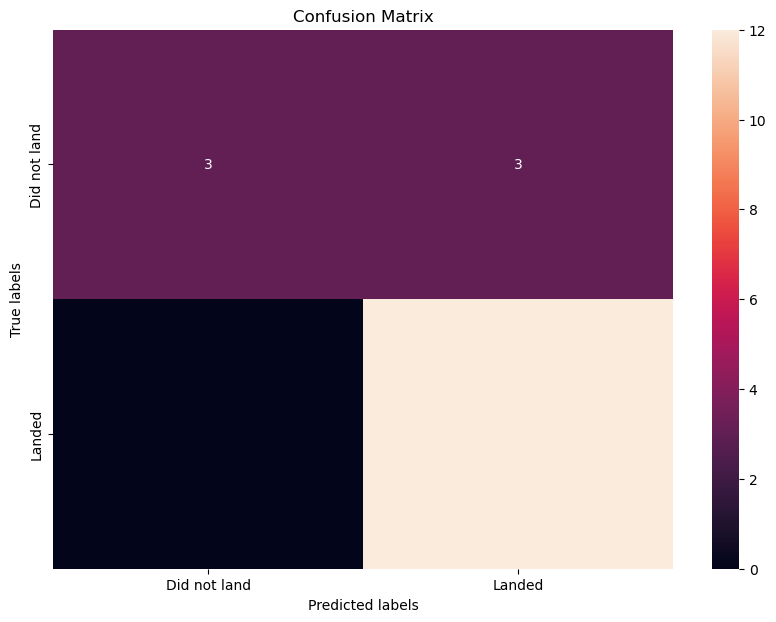

In [219]:
yhat_lr1=logreg_cv1.predict(X_test)
plot_confusion_matrix(Y_test,yhat_lr1)

In [220]:
cm1 = confusion_matrix(Y_test, yhat_lr1)
print(cm1)

[[ 3  3]
 [ 0 12]]


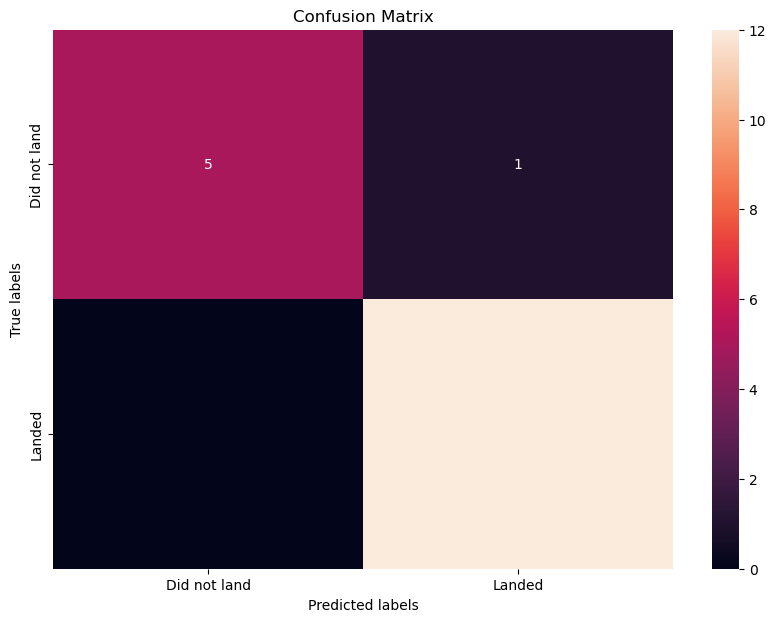

In [221]:
yhat_lr2=logreg_cv2.predict(X_test)
plot_confusion_matrix(Y_test,yhat_lr2)

In [222]:
cm2 = confusion_matrix(Y_test, yhat_lr2)
print(cm2)

[[ 5  1]
 [ 0 12]]


In [223]:
from sklearn.metrics import classification_report

report1 = classification_report(Y_test, yhat_lr1, target_names=['Did not land', 'Landed'])
report2 = classification_report(Y_test, yhat_lr2, target_names=['Did not land', 'Landed'])

print("Classification Report for Model 1:")
print(report1)
print("\nClassification Report for Model 2:")
print(report2)


Classification Report for Model 1:
              precision    recall  f1-score   support

Did not land       1.00      0.50      0.67         6
      Landed       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18


Classification Report for Model 2:
              precision    recall  f1-score   support

Did not land       1.00      0.83      0.91         6
      Landed       0.92      1.00      0.96        12

    accuracy                           0.94        18
   macro avg       0.96      0.92      0.93        18
weighted avg       0.95      0.94      0.94        18



Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the major problem is false positives.


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [224]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm1 = SVC()

In [225]:
svm_grid_search1 = GridSearchCV(estimator=svm1, param_grid=parameters, cv=10, scoring='accuracy')

svm_cv1 = svm_grid_search1.fit(X_train, Y_train)
svm_cv1

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')},
             scoring='accuracy')

In [226]:
print("tuned hpyerparameters :(best parameters) ",svm_cv1.best_params_)
print("accuracy :",svm_cv1.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142858


In [227]:
parameters = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': np.logspace(-4, 4, 10),
    'gamma': np.logspace(-4, 4, 10),
    'degree': [2, 3, 4]
}

svm2=SVC()

In [228]:
svm_grid_search2 = GridSearchCV(estimator=svm2, param_grid=parameters, cv=10, scoring='roc_auc')

svm_cv2 = svm_grid_search2.fit(X_train, Y_train)
svm_cv2


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
                         'degree': [2, 3, 4],
                         'gamma': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='roc_auc')

In [229]:
print("tuned hpyerparameters :(best parameters) ",svm_cv2.best_params_)
print("accuracy :",svm_cv2.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.005994842503189409, 'degree': 2, 'gamma': 0.000774263682681127, 'kernel': 'rbf'}
accuracy : 0.9


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [230]:
svm_accuracy1 = svm_cv1.score(X_test, Y_test)
print(f"SVM test data accuracy: {svm_accuracy1}")

SVM test data accuracy: 0.8333333333333334


We can plot the confusion matrix


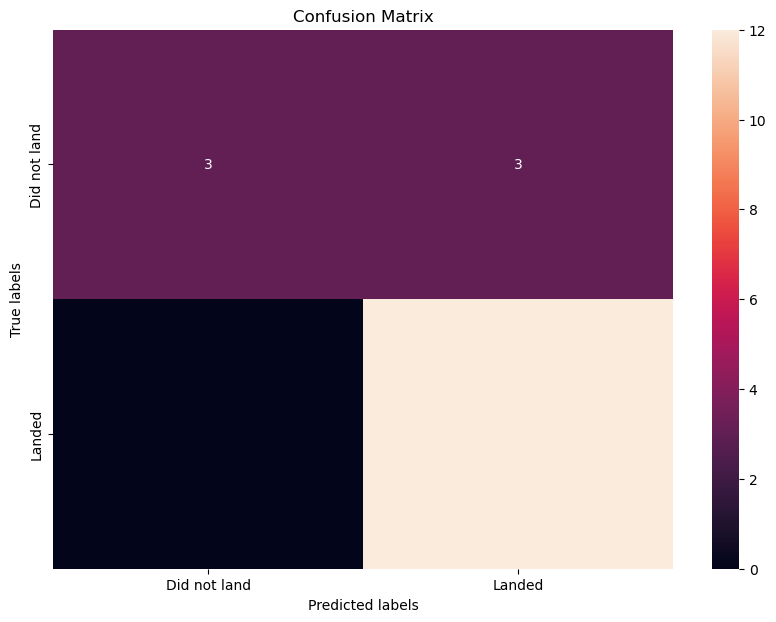

In [231]:
yhat_svm1=svm_cv1.predict(X_test)
plot_confusion_matrix(Y_test,yhat_svm1)


In [232]:
svm_accuracy2 = svm_cv2.score(X_test, Y_test)
print(f"SVM test data accuracy: {svm_accuracy2}")

SVM test data accuracy: 0.875


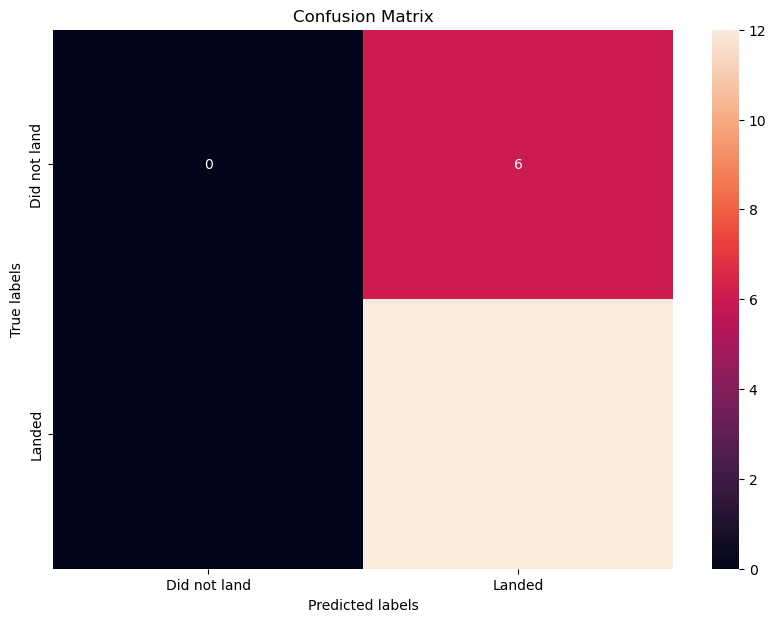

[[ 0  6]
 [ 0 12]]


In [233]:
yhat_svm2=svm_cv2.predict(X_test)
plot_confusion_matrix(Y_test,yhat_svm2)
svm_cm2 = confusion_matrix(Y_test, yhat_svm2)
print(svm_cm2)

In [234]:
svm_report1 = classification_report(Y_test, yhat_svm1, target_names=['Did not land', 'Landed'])
svm_report2 = classification_report(Y_test, yhat_svm2, target_names=['Did not land', 'Landed'])

print("Classification Report for Model 1:")
print(svm_report1)
print("\nClassification Report for Model 2:")
print(svm_report2)

Classification Report for Model 1:
              precision    recall  f1-score   support

Did not land       1.00      0.50      0.67         6
      Landed       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18


Classification Report for Model 2:
              precision    recall  f1-score   support

Did not land       0.00      0.00      0.00         6
      Landed       0.67      1.00      0.80        12

    accuracy                           0.67        18
   macro avg       0.33      0.50      0.40        18
weighted avg       0.44      0.67      0.53        18



/Users/ykwim/Desktop/Data Science Fundamentals/.conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ykwim/Desktop/Data Science Fundamentals/.conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ykwim/Desktop/Data Science Fundamentals/.conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [235]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree1 = DecisionTreeClassifier()

In [236]:
tree_grid_search1 = GridSearchCV(estimator=tree1, param_grid=parameters, cv=10, scoring='accuracy', error_score='raise')
tree_cv1 = tree_grid_search1.fit(X_train, Y_train)
tree_cv1

GridSearchCV(cv=10, error_score='raise', estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [237]:
print("tuned hyperparameters :(best parameters) ",tree_cv1.best_params_)
print("accuracy :",tree_cv1.best_score_)

tuned hyperparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}
accuracy : 0.8482142857142856


In [238]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['sqrt', 'log2', None],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10],
     'class_weight': ['balanced'],
     'ccp_alpha': [0.0, 0.01, 0.1]}

tree2 = DecisionTreeClassifier()

In [239]:
strat_cv = StratifiedKFold(n_splits=10)
tree_grid_search2 = GridSearchCV(estimator=tree2, param_grid=parameters, cv=strat_cv, scoring='roc_auc')
tree_cv2 = tree_grid_search2.fit(X_train, Y_train)
tree_cv2

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.0, 0.01, 0.1],
                         'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='roc_auc')

In [240]:
print("tuned hyperparameters :(best parameters) ",tree_cv2.best_params_)
print("score :",tree_cv2.best_score_)

tuned hyperparameters :(best parameters)  {'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
score : 0.9008333333333333


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [241]:
tree_accuracy1 = tree_cv1.score(X_test, Y_test)
print(f"Decision Tree 1 test data accuracy: {tree_accuracy1}")

Decision Tree 1 test data accuracy: 0.6111111111111112


In [242]:
tree_accuracy2 = tree_cv2.score(X_test, Y_test)
print(f"Decision Tree 2 test data accuracy: {tree_accuracy2}")

Decision Tree 2 test data accuracy: 0.8958333333333334


We can plot the confusion matrix


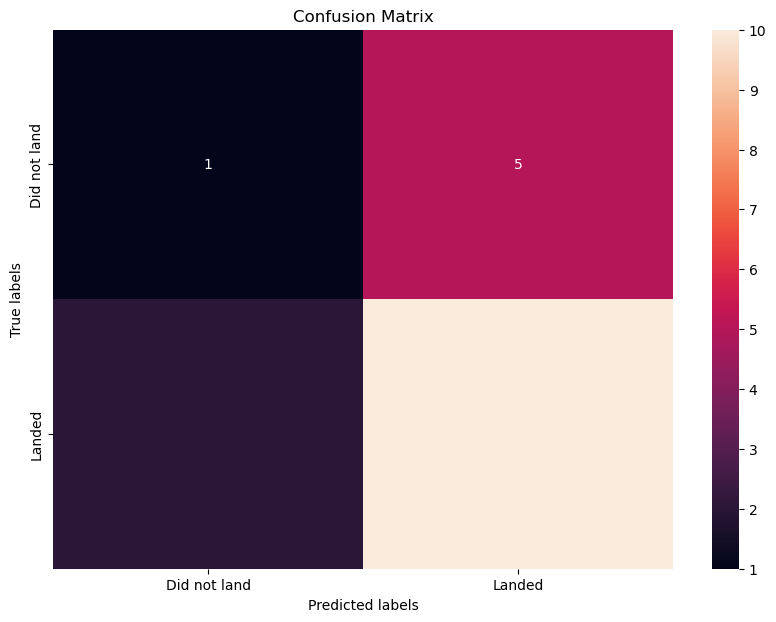

[[ 1  5]
 [ 2 10]]


In [243]:
yhat_tree1 = tree_cv1.predict(X_test)
plot_confusion_matrix(Y_test,yhat_tree1)
tree_cm1 = confusion_matrix(Y_test, yhat_tree1)
print(tree_cm1)

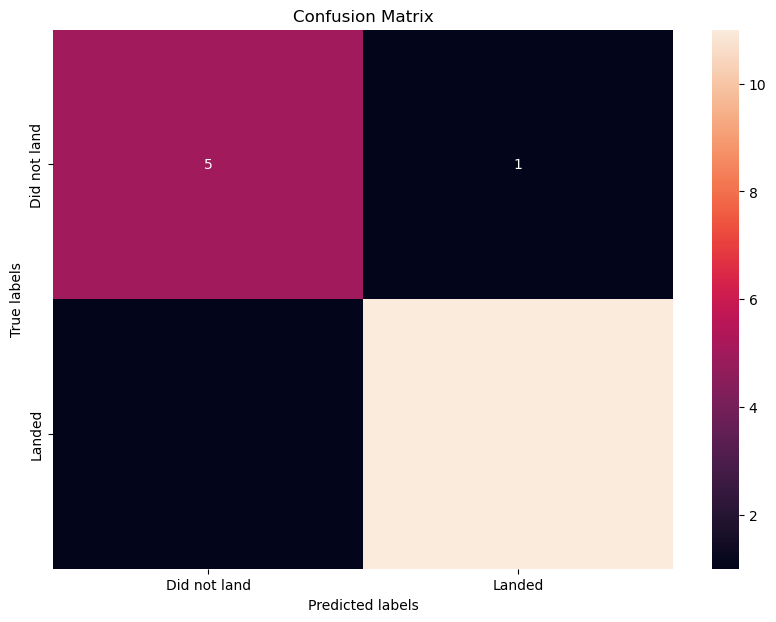

[[ 5  1]
 [ 1 11]]


In [244]:
yhat_tree2 = tree_cv2.predict(X_test)
plot_confusion_matrix(Y_test,yhat_tree2)
tree_cm2 = confusion_matrix(Y_test, yhat_tree2)
print(tree_cm2)

In [245]:
tree_report1 = classification_report(Y_test, yhat_tree1, target_names=['Did not land', 'Landed'])
tree_report2 = classification_report(Y_test, yhat_tree2, target_names=['Did not land', 'Landed'])

print("Classification Report for KNN Model 1:")
print(tree_report1)
print("\nClassification Report for KNN Model 2:")
print(tree_report2)

Classification Report for KNN Model 1:
              precision    recall  f1-score   support

Did not land       0.33      0.17      0.22         6
      Landed       0.67      0.83      0.74        12

    accuracy                           0.61        18
   macro avg       0.50      0.50      0.48        18
weighted avg       0.56      0.61      0.57        18


Classification Report for KNN Model 2:
              precision    recall  f1-score   support

Did not land       0.83      0.83      0.83         6
      Landed       0.92      0.92      0.92        12

    accuracy                           0.89        18
   macro avg       0.88      0.88      0.88        18
weighted avg       0.89      0.89      0.89        18



## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [246]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN1 = KNeighborsClassifier()

In [247]:
knn_grid_search1 = GridSearchCV(estimator=KNN1, param_grid=parameters, cv=10, scoring='accuracy', error_score='raise', n_jobs = 1)
knn_cv1 = knn_grid_search1.fit(X_train, Y_train)
knn_cv1

GridSearchCV(cv=10, error_score='raise', estimator=KNeighborsClassifier(),
             n_jobs=1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]},
             scoring='accuracy')

In [248]:
print("tuned hyperparameters :(best parameters) ",knn_cv1.best_params_)
print("accuracy :",knn_cv1.best_score_)

tuned hyperparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 6, 'p': 1}
accuracy : 0.8339285714285714


In [249]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [250]:
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('knn', KNeighborsClassifier(algorithm='auto'))
])

parameters = {
    'knn__n_neighbors': range(1, 20),
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]
}

In [251]:
knn_grid_search2 = GridSearchCV(pipeline, parameters, cv=StratifiedKFold(5), scoring='roc_auc')
knn_cv2 = knn_grid_search2.fit(X_train, Y_train)
knn_cv2

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': range(1, 20), 'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']},
             scoring='roc_auc')

In [252]:
print("tuned hyperparameters :(best parameters) ",knn_cv2.best_params_)
print("best cross-validation score:",knn_cv2.best_score_)

tuned hyperparameters :(best parameters)  {'knn__n_neighbors': 18, 'knn__p': 2, 'knn__weights': 'uniform'}
best cross-validation score: 0.8664444444444446


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [253]:
knn_accuracy1 = knn_cv1.score(X_test, Y_test)
print(f"KNN1 test data accuracy: {knn_accuracy1}")

KNN1 test data accuracy: 0.8333333333333334


In [254]:
knn_accuracy2 = knn_cv2.score(X_test, Y_test)
print(f"KNN1 test data accuracy: {knn_accuracy2}")

KNN1 test data accuracy: 0.8194444444444444


We can plot the confusion matrix


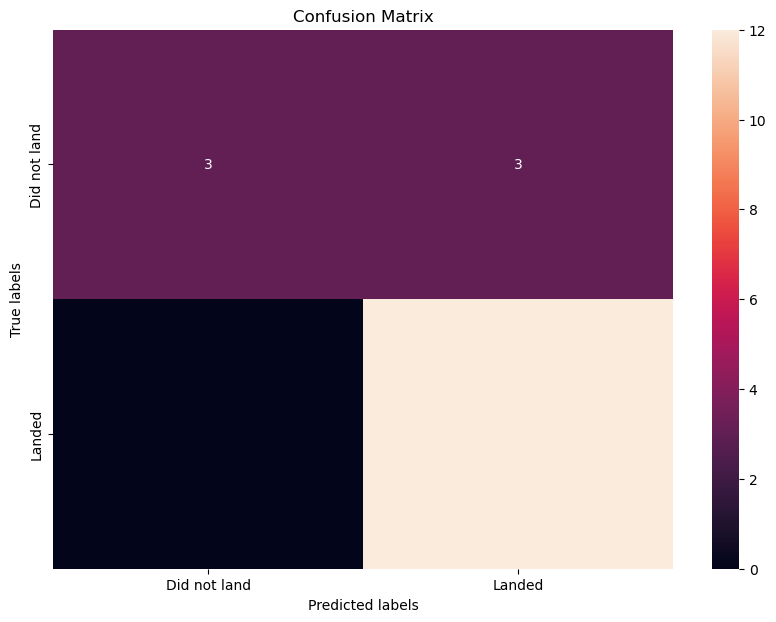

[[ 3  3]
 [ 0 12]]


In [255]:
yhat_knn1 = knn_cv1.predict(X_test)
plot_confusion_matrix(Y_test,yhat_knn1)
knn_cm1 = confusion_matrix(Y_test, yhat_knn1)
print(knn_cm1)

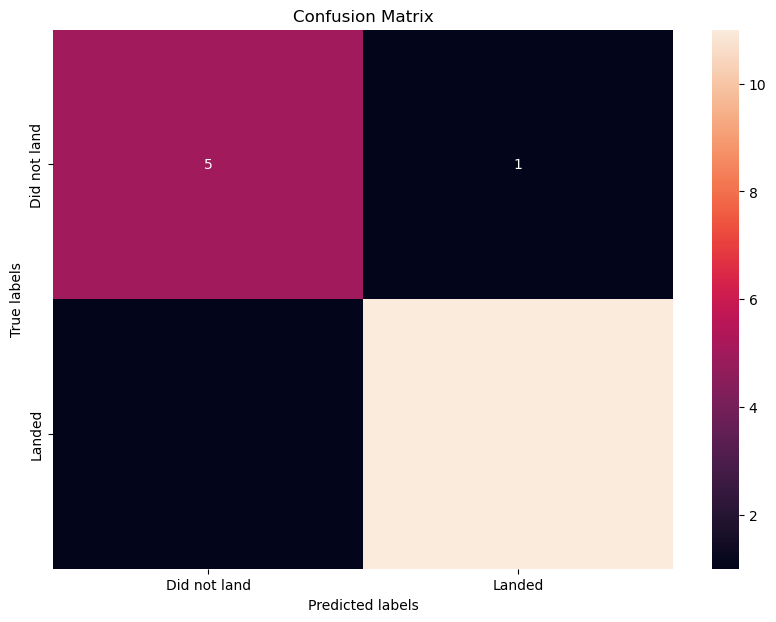

[[ 5  1]
 [ 1 11]]


In [256]:
yhat_knn2 = knn_cv2.predict(X_test)
plot_confusion_matrix(Y_test,yhat_knn2)
knn_cm2 = confusion_matrix(Y_test, yhat_knn2)
print(knn_cm2)

In [257]:
knn_report1 = classification_report(Y_test, yhat_knn1, target_names=['Did not land', 'Landed'])
knn_report2 = classification_report(Y_test, yhat_knn2, target_names=['Did not land', 'Landed'])

print("Classification Report for KNN Model 1:")
print(knn_report1)
print("\nClassification Report for KNN Model 2:")
print(knn_report2)

Classification Report for KNN Model 1:
              precision    recall  f1-score   support

Did not land       1.00      0.50      0.67         6
      Landed       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18


Classification Report for KNN Model 2:
              precision    recall  f1-score   support

Did not land       0.83      0.83      0.83         6
      Landed       0.92      0.92      0.92        12

    accuracy                           0.89        18
   macro avg       0.88      0.88      0.88        18
weighted avg       0.89      0.89      0.89        18



## TASK  12


Find the method performs best:


In [258]:
models = {
    'KNeighbors1': {
        'score': knn_cv1.best_score_,
        'params': knn_cv1.best_params_
    },
    'KNeighbors2': {
        'score': knn_cv2.best_score_,
        'params': knn_cv2.best_params_
    },
    'DecisionTree1': {
        'score': tree_cv1.best_score_,
        'params': tree_cv1.best_params_
    },
    'DecisionTree2': {
        'score': tree_cv2.best_score_,
        'params': tree_cv2.best_params_
    },
    'LogisticRegression1': {
        'score': logreg_cv1.best_score_,
        'params': logreg_cv1.best_params_
    },
    'LogisticRegression2': {
        'score': logreg_cv2.best_score_,
        'params': logreg_cv2.best_params_
    },
    'SupportVector1': {
        'score': svm_cv1.best_score_,
        'params': svm_cv1.best_params_
    },
    'SupportVector2': {
        'score': svm_cv2.best_score_,
        'params': svm_cv2.best_params_
    }
}

"""
lambda x: models[x]['score']: This lambda function iterates over the keys of the models dictionary (i.e., model names), and for each key,
it accesses the corresponding value (which itself is a dictionary),
and then returns the 'score' from this nested dictionary
"""

best_model = max(models, key=lambda x: models[x]['score'])
best_score = models[best_model]['score']
best_params = models[best_model]['params']


print(f"The best model is {best_model} with a score of {best_score}")
print("Best parameters:", best_params)

The best model is DecisionTree2 with a score of 0.9008333333333333
Best parameters: {'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


In [260]:
from sklearn.model_selection import cross_validate

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

model_scores = {
    'knn_cv1': cross_validate(knn_cv1.best_estimator_, X_train, Y_train, scoring=scoring, cv=10),
    'knn_cv2': cross_validate(knn_cv2.best_estimator_, X_train, Y_train, scoring=scoring, cv=10),
    'tree_cv1': cross_validate(tree_cv1.best_estimator_, X_train, Y_train, scoring=scoring, cv=10),
    'tree_cv2': cross_validate(tree_cv2.best_estimator_, X_train, Y_train, scoring=scoring, cv=10),
    'logreg_cv1': cross_validate(logreg_cv1.best_estimator_, X_train, Y_train, scoring=scoring, cv=10),
    'logreg_cv2': cross_validate(logreg_cv2.best_estimator_, X_train, Y_train, scoring=scoring, cv=10),
    'svm_cv1': cross_validate(svm_cv1.best_estimator_, X_train, Y_train, scoring=scoring, cv=10),
    'svm_cv2': cross_validate(svm_cv2.best_estimator_, X_train, Y_train, scoring=scoring, cv=10)
}

# Summarize results
for model, scores in model_scores.items():
    print(f"{model}:")
    for score in ['test_accuracy', 'test_precision', 'test_recall', 'test_f1', 'test_roc_auc']:
        mean_score = np.mean(scores[score])
        print(f"  Average {score}: {mean_score:.4f}")


knn_cv1:
  Average test_accuracy: 0.8339
  Average test_precision: 0.8267
  Average test_recall: 0.9600
  Average test_f1: 0.8853
  Average test_roc_auc: 0.8525
knn_cv2:
  Average test_accuracy: 0.8339
  Average test_precision: 0.9100
  Average test_recall: 0.8600
  Average test_f1: 0.8694
  Average test_roc_auc: 0.8733
tree_cv1:
  Average test_accuracy: 0.7589
  Average test_precision: 0.8231
  Average test_recall: 0.8300
  Average test_f1: 0.8158
  Average test_roc_auc: 0.8350
tree_cv2:
  Average test_accuracy: 0.8446
  Average test_precision: 0.9400
  Average test_recall: 0.8350
  Average test_f1: 0.8785
  Average test_roc_auc: 0.8742
logreg_cv1:
  Average test_accuracy: 0.8214
  Average test_precision: 0.8417
  Average test_recall: 0.9150
  Average test_f1: 0.8691
  Average test_roc_auc: 0.8233
logreg_cv2:
  Average test_accuracy: 0.7911
  Average test_precision: 0.8281
  Average test_recall: 0.9000
  Average test_f1: 0.8509
  Average test_roc_auc: 0.8717
svm_cv1:
  Average test_ac

In [273]:
from sklearn.model_selection import cross_val_score

models = {
    'knn_cv1': knn_cv1.best_estimator_,
    'knn_cv2': knn_cv2.best_estimator_,
    'tree_cv1': tree_cv1.best_estimator_,
    'tree_cv2': tree_cv2.best_estimator_,
    'logreg_cv1': logreg_cv1.best_estimator_,
    'logreg_cv2': logreg_cv2.best_estimator_,
    'svm_cv1': svm_cv1.best_estimator_,
    'svm_cv2': svm_cv2.best_estimator_
}

precision_scores = {model_name: cross_val_score(model, X_train, Y_train, scoring='precision', cv=10) for model_name, model in models.items()}

average_precision = {model_name: np.mean(scores) for model_name, scores in precision_scores.items()}
print(average_precision)


{'knn_cv1': 0.8266666666666665, 'knn_cv2': 0.9100000000000001, 'tree_cv1': 0.8252380952380953, 'tree_cv2': 0.9433333333333334, 'logreg_cv1': 0.8416666666666666, 'logreg_cv2': 0.8280952380952382, 'svm_cv1': 0.8433333333333334, 'svm_cv2': 0.6678571428571429}


In [281]:
average_precision_df = pd.DataFrame(list(average_precision.items()), columns=['Model', 'Average Precision'])
average_precision_df = average_precision_df.sort_values(by='Average Precision', ascending=False)
average_precision_df

,Model,Average Precision
3,tree_cv2,0.943333
1,knn_cv2,0.910000
6,svm_cv1,0.843333
4,logreg_cv1,0.841667
5,logreg_cv2,0.828095
0,knn_cv1,0.826667
2,tree_cv1,0.825238
7,svm_cv2,0.667857


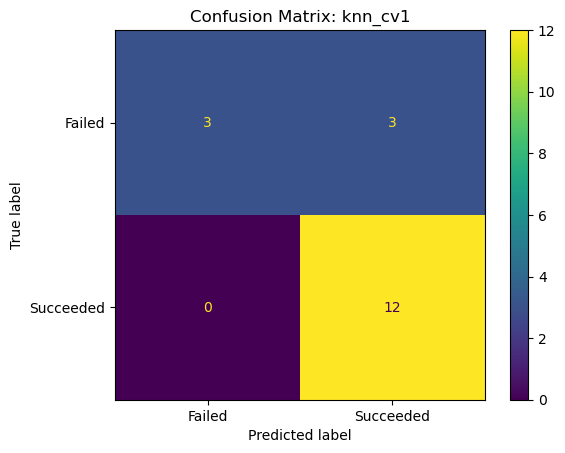

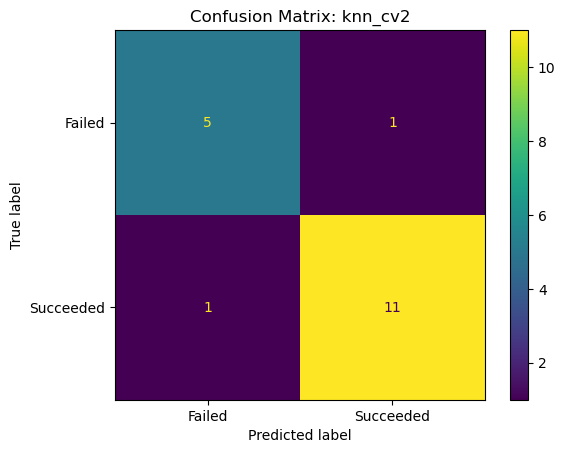

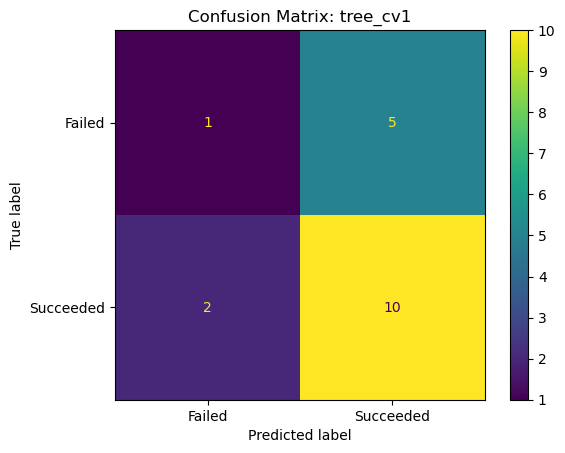

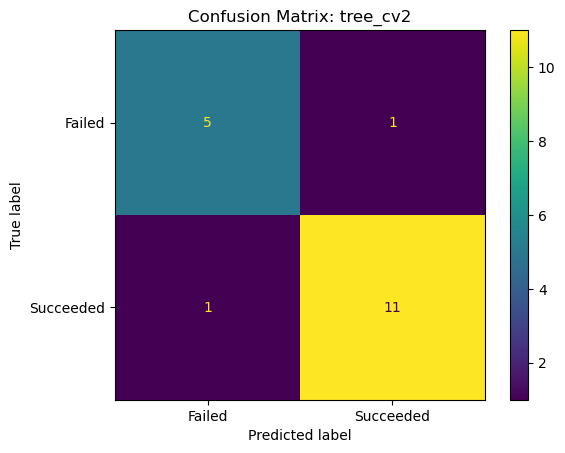

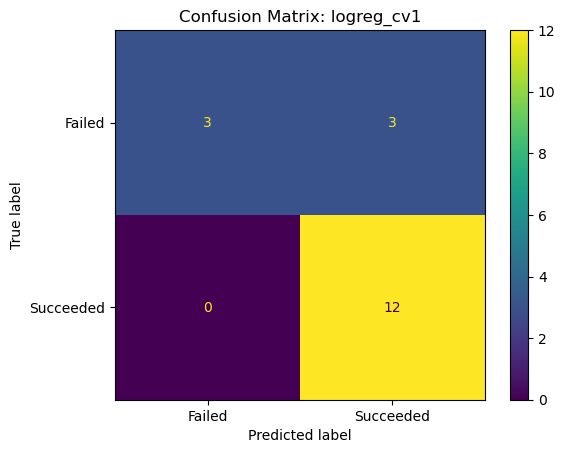

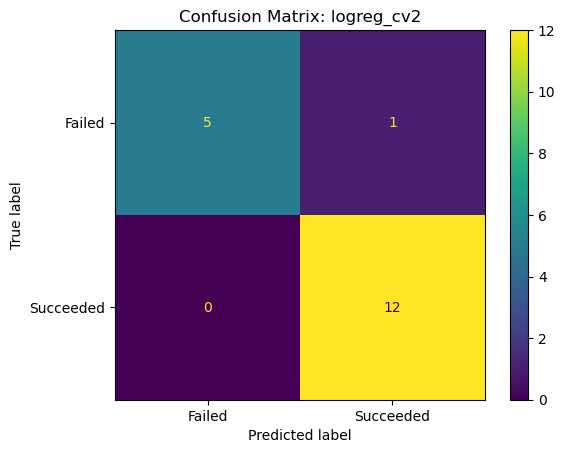

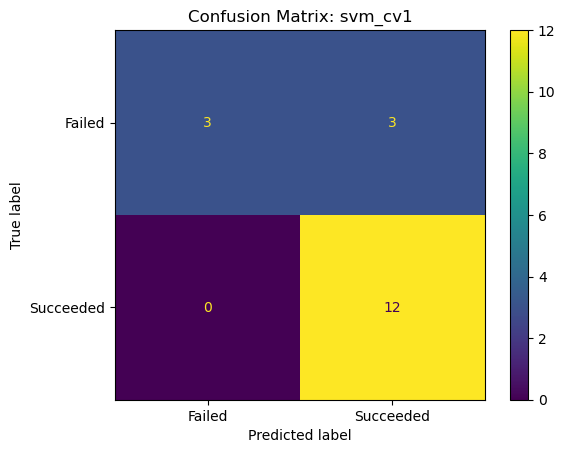

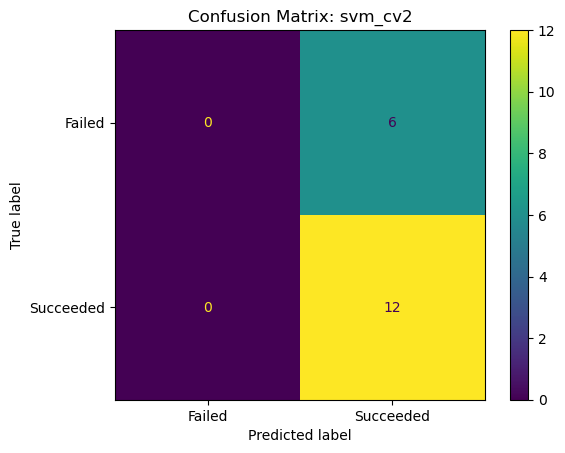

In [282]:
for model_name, model in models.items():
    y_pred = model.predict(X_test)

    cm = confusion_matrix(Y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Failed', 'Succeeded'])

    disp.plot()
    plt.title(f'Confusion Matrix: {model_name}')
    plt.show()



In [283]:
# Find the model with the highest average precision
best_precision_model = max(average_precision, key=average_precision.get)
print(f"Model with the highest average precision: {best_precision_model} (Precision: {average_precision[best_precision_model]:.4f})")


Model with the highest average precision: tree_cv2 (Precision: 0.9433)


In [286]:
def calculate_metrics(TN, FP, FN, TP):
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    accuracy = (TP + TN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) != 0 else 0
    return {
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1_score,
        "Accuracy": accuracy
    }

model_metrics = {
    'knn_cv1': (3, 3, 0, 12),
    'knn_cv2': (5, 1, 1, 11),
    'tree_cv1': (1, 5, 2, 10),
    'tree_cv2': (5, 1, 1, 11),
    'logreg_cv1': (3, 3, 0, 12),
    'logreg_cv2': (5, 1, 0, 12),
    'svm_cv1': (3, 3, 0, 12),
    'svm_cv2': (0, 6, 0, 12)
}

for model, values in model_metrics.items():
    TN, FP, FN, TP = values
    metrics = calculate_metrics(TN, FP, FN, TP)
    print(f"{model} Metrics:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.3f}")
    print()


knn_cv1 Metrics:
  Precision: 0.800
  Recall: 1.000
  F1-Score: 0.889
  Accuracy: 0.833

knn_cv2 Metrics:
  Precision: 0.917
  Recall: 0.917
  F1-Score: 0.917
  Accuracy: 0.889

tree_cv1 Metrics:
  Precision: 0.667
  Recall: 0.833
  F1-Score: 0.741
  Accuracy: 0.611

tree_cv2 Metrics:
  Precision: 0.917
  Recall: 0.917
  F1-Score: 0.917
  Accuracy: 0.889

logreg_cv1 Metrics:
  Precision: 0.800
  Recall: 1.000
  F1-Score: 0.889
  Accuracy: 0.833

logreg_cv2 Metrics:
  Precision: 0.923
  Recall: 1.000
  F1-Score: 0.960
  Accuracy: 0.944

svm_cv1 Metrics:
  Precision: 0.800
  Recall: 1.000
  F1-Score: 0.889
  Accuracy: 0.833

svm_cv2 Metrics:
  Precision: 0.667
  Recall: 1.000
  F1-Score: 0.800
  Accuracy: 0.667



In [288]:
# Dictionary of model metrics for visualization
model_metrics = {
    'knn_cv1': {'TN': 3, 'FP': 3, 'FN': 0, 'TP': 12},
    'knn_cv2': {'TN': 5, 'FP': 1, 'FN': 1, 'TP': 11},
    'tree_cv1': {'TN': 1, 'FP': 5, 'FN': 2, 'TP': 10},
    'tree_cv2': {'TN': 5, 'FP': 1, 'FN': 1, 'TP': 11},
    'logreg_cv1': {'TN': 3, 'FP': 3, 'FN': 0, 'TP': 12},
    'logreg_cv2': {'TN': 5, 'FP': 1, 'FN': 0, 'TP': 12},
    'svm_cv1': {'TN': 3, 'FP': 3, 'FN': 0, 'TP': 12},
    'svm_cv2': {'TN': 0, 'FP': 6, 'FN': 0, 'TP': 12}
}


def calculate_metrics(metrics):
    TN, FP, FN, TP = metrics['TN'], metrics['FP'], metrics['FN'], metrics['TP']
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    accuracy = (TP + TN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) != 0 else 0
    return {'Precision': precision, 'Recall': recall, 'F1-Score': f1_score, 'Accuracy': accuracy}


data = {model: calculate_metrics(metrics) for model, metrics in model_metrics.items()}
df = pd.DataFrame(data).T


df

,Precision,Recall,F1-Score,Accuracy
knn_cv1,0.800000,1.000000,0.888889,0.833333
knn_cv2,0.916667,0.916667,0.916667,0.888889
tree_cv1,0.666667,0.833333,0.740741,0.611111
tree_cv2,0.916667,0.916667,0.916667,0.888889
logreg_cv1,0.800000,1.000000,0.888889,0.833333
logreg_cv2,0.923077,1.000000,0.960000,0.944444
svm_cv1,0.800000,1.000000,0.888889,0.833333
svm_cv2,0.666667,1.000000,0.800000,0.666667


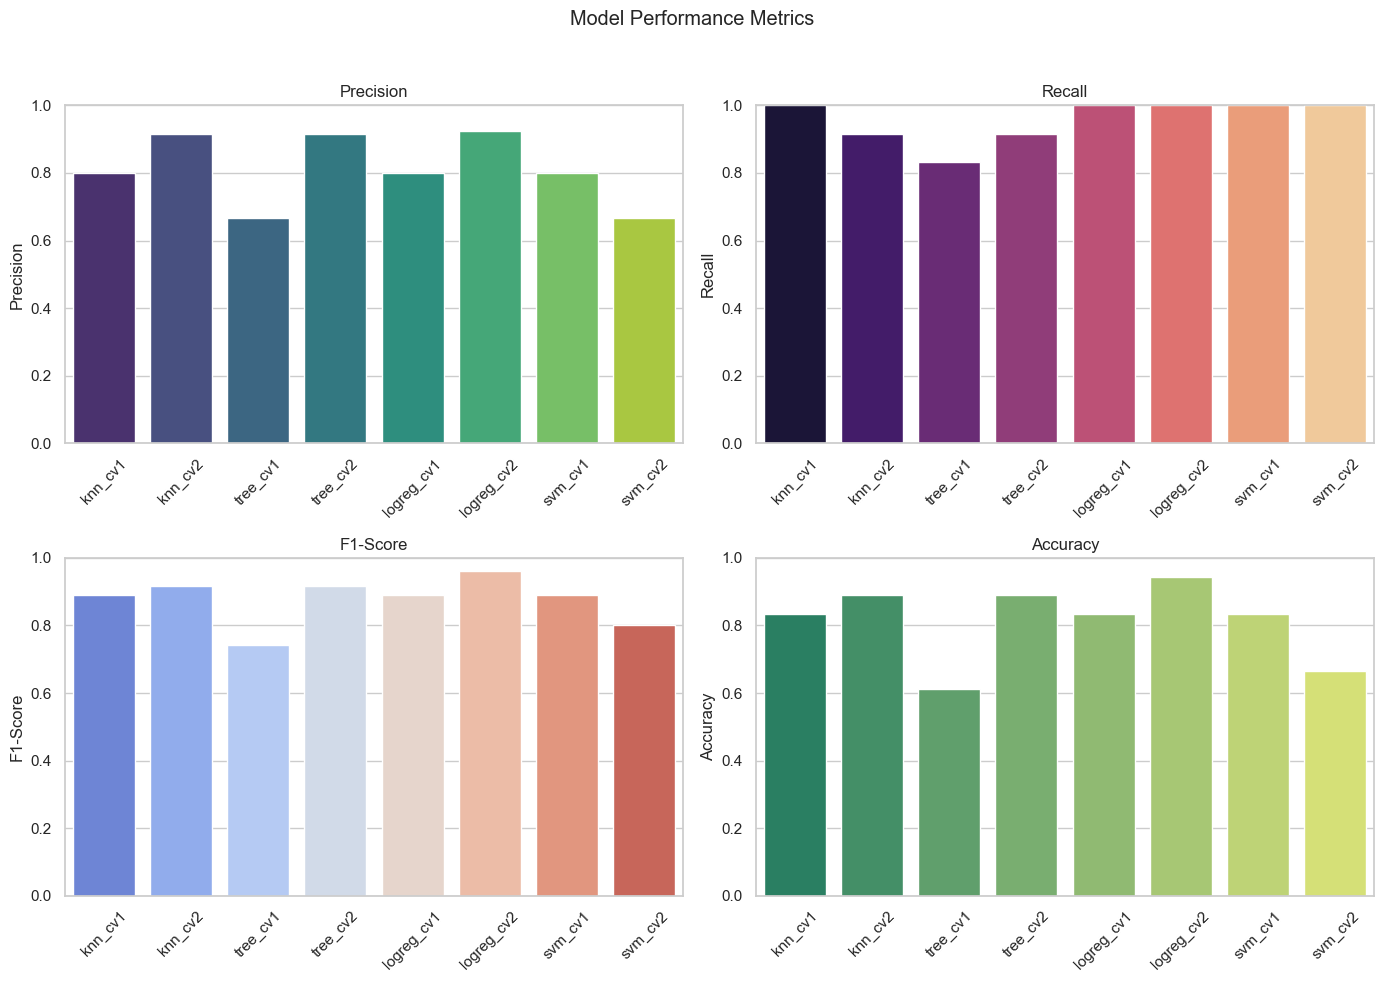

In [289]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Model Performance Metrics')

sns.barplot(ax=axes[0, 0], x=df.index, y='Precision', data=df, palette='viridis')
axes[0, 0].set_title('Precision')
axes[0, 0].set_ylim(0, 1)
axes[0, 0].set_xticklabels(df.index, rotation=45)

sns.barplot(ax=axes[0, 1], x=df.index, y='Recall', data=df, palette='magma')
axes[0, 1].set_title('Recall')
axes[0, 1].set_ylim(0, 1)
axes[0, 1].set_xticklabels(df.index, rotation=45)

sns.barplot(ax=axes[1, 0], x=df.index, y='F1-Score', data=df, palette='coolwarm')
axes[1, 0].set_title('F1-Score')
axes[1, 0].set_ylim(0, 1)
axes[1, 0].set_xticklabels(df.index, rotation=45)

sns.barplot(ax=axes[1, 1], x=df.index, y='Accuracy', data=df, palette='summer')
axes[1, 1].set_title('Accuracy')
axes[1, 1].set_ylim(0, 1)
axes[1, 1].set_xticklabels(df.index, rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
